# MO1 Homework

Author:Lathan Gregg
Date: 01/20/2025

In [1]:
import numpy as np
import pandas as pd
import configparser
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']


In [3]:
!ls -l {data_home}

total 1872
-rw-r--r--@ 1 lathangregg  staff  488857 Jan 16 16:09 gutenberg:pg105.txt
-rw-r--r--@ 1 lathangregg  staff  465627 Jan 20 17:24 pg42324.txt


In [5]:
src_file = f"{data_home}/pg42324.txt"
lines = open(src_file, 'r').readlines()

In [7]:
lines[:5]

['\ufeffThe Project Gutenberg EBook of Frankenstein, by Mary W. Shelley\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n']

In [10]:
text = pd.DataFrame(lines)
text.columns = ['line_str']
text.index.name = 'line_num'
text.head()

,line_str
line_num,
0,"﻿The Project Gutenberg EBook of Frankenstein, ..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...


## Question 1
How many tokens does the raw text have? By raw text, we mean the text as-is, without all of the Gutenberg boilerplate removed.

In [ ]:
K = text.line_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['link_num','token_num']
K.head()

,,token_str
link_num,token_num,
3897,8,"dismount,"
1473,11,the
3285,12,of
300,10,I
3974,9,"governments,"
4694,10,a
5769,3,I
1391,9,protector.
2069,1,and


In [27]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()
K.head()

token_str   term_str
link_num token_num                      
0        0               ﻿The        the
         1            Project    project
         2          Gutenberg  gutenberg
         3              EBook      ebook
         4                 of         of

In [29]:
K.shape

(80985, 2)

In [42]:
print(f"The text has {K.shape[0]} tokens")

The text has 80985 tokens


## Question 2
What is the most frequent pronoun in the text?

In [32]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'
V['p'] = V.n / V.n.sum()
V.head()

,n,p
term_str,,
the,4575,0.056492
and,3120,0.038526
of,2918,0.036031
i,2918,0.036031
to,2257,0.027869


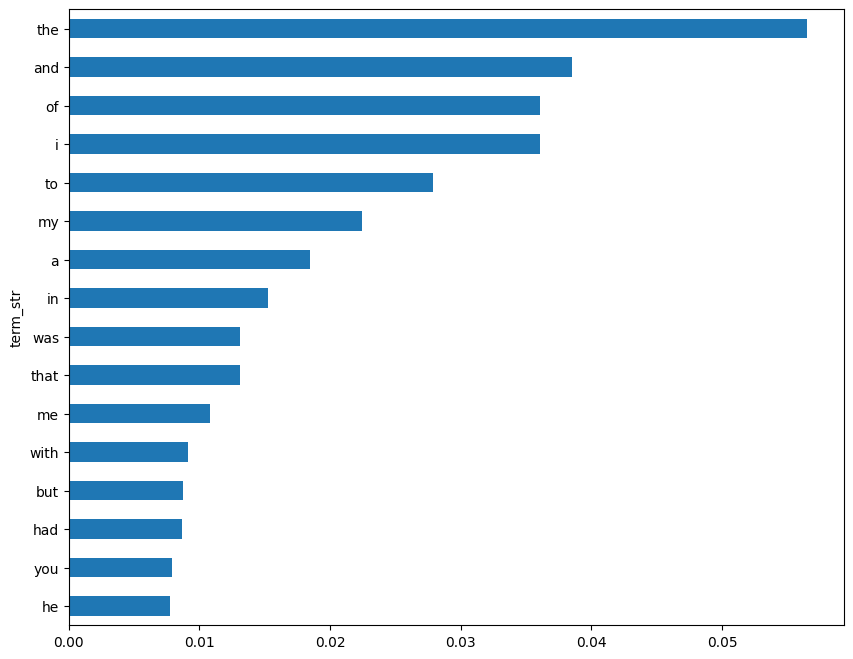

In [39]:
V.p.head(16).sort_values().plot.barh(figsize=(10,8));

The most frequent pronoun in the text is **the personal pronoun "I"** followed by "my", "me", and "he"

## Question 3
Which subject pronoun is most frequent in the text we imported in class? 

**The most frequent pronoun in the book Persuasion by Jane Austen is "her" followed by "she"**

## Question 4
Provide a brief explanation for this difference, based on what you may know about the two novels.

Based on the pronouns that were most often used in *Frankenstein*, I would guess **the book is written in first tense and focuses on a male protaganist**. Based on the most common pronouns in *Persuasion,* the book is **written from a third person perspective with a female protaganist.** I have not read either book but some quick research confirms that *Frankenstein* is written from a first person point of view that shifts between three male characters Captain Walton, Victor Frankenstein, and the Monster. *Persuasion* is written from a third person perspective and focuseses on the character Anne Elliot. The different perspectives and genders of characters explains the differences in which pronouns are most frequently used.